# **Importing the required libraries**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
# sns.set()

# **Importing and Inspecting Data**

In [12]:
dataset = pd.read_csv('/content/reviews.csv')
dataset

,Review,Sentiment
0,This product exceeded my expectations! It's hi...,Positive
1,"The product was decent. It worked fine, but it...",Neutral
2,I had a terrible experience with this company....,Negative
3,It's an okay product. Nothing to write home ab...,Neutral
4,Disappointed with the product. It didn't meet ...,Negative
...,...,...
381,I'm extremely dissatisfied with this product. ...,Negative
382,"The product was decent. It worked fine, but it...",Neutral
383,This product is outstanding! It's exactly what...,Positive
384,"The product was decent. It worked fine, but it...",Neutral


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     386 non-null    object
 1   Sentiment  386 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


# **Exploring Data**

In [14]:
dataset['Sentiment'].value_counts()    # Highly balanced data

,count
Sentiment,
Positive,129
Negative,129
Neutral,128


<Axes: xlabel='Sentiment', ylabel='count'>

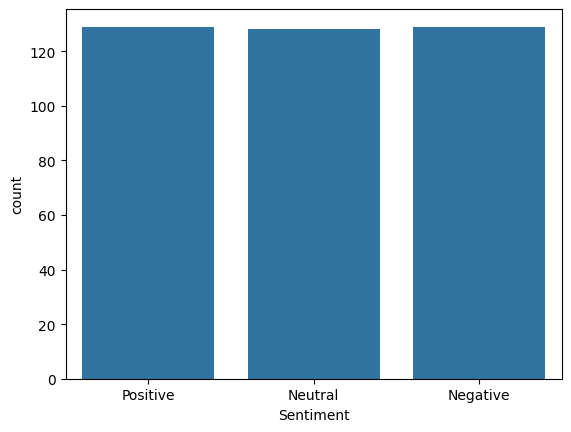

In [15]:
sns.countplot(x=dataset['Sentiment'])

In [16]:
dataset['Review Count'] = dataset['Review'].apply(len)   # Length letter counter
dataset

,Review,Sentiment,Review Count
0,This product exceeded my expectations! It's hi...,Positive,89
1,"The product was decent. It worked fine, but it...",Neutral,71
2,I had a terrible experience with this company....,Negative,91
3,It's an okay product. Nothing to write home ab...,Neutral,50
4,Disappointed with the product. It didn't meet ...,Negative,62
...,...,...,...
381,I'm extremely dissatisfied with this product. ...,Negative,94
382,"The product was decent. It worked fine, but it...",Neutral,71
383,This product is outstanding! It's exactly what...,Positive,85
384,"The product was decent. It worked fine, but it...",Neutral,71


In [17]:
dataset.iloc[dataset['Review Count'].idxmax()]

,242
Review,The product arrived promptly and was well-pack...
Sentiment,Positive
Review Count,146


# **Preprocessing Data (NLTK Text Data Cleaning)**

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stopwords = stopwords.words('english')          # Stopwords Removal
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
from nltk.stem import PorterStemmer, LancasterStemmer    # Stemming
#ls = LancasterStemmer()      # LancasterStemmer
ps = PorterStemmer()          # PorterStemmer

In [21]:
from nltk.stem import WordNetLemmatizer        # Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
corpus = []

for i in range(len(dataset)):
  sentance = re.sub('[^a-zA-Z]'," ",dataset['Review'][i])
  sentance = sentance.lower()
  sentance = sentance.split()
  sentance = [word for word in sentance if word not in stopwords]
  sentance = ' '.join(sentance)
  sentance = ps.stem(sentance)
  sentance = lemmatizer.lemmatize(sentance)
  corpus.append(sentance)
corpus

['product exceeded expectations high quality performs exceptionally wel',
 'product decent worked fine anything speci',
 'terrible experience company customer service rude unhelp',
 'okay product nothing write hom',
 'disappointed product meet expect',
 'avoid company costs service terrible products subpar',
 'terrible experience company customer service rude unhelp',
 'avoid company costs service terrible products subpar',
 'product exceeded expectations high quality performs exceptionally wel',
 'product outstanding exactly looking works perfectli',
 'absolutely horrendous service nev',
 'terrible experience company customer service rude unhelp',
 'experience okay nothing speci',
 'top quality product satisfied purchas',
 'extremely dissatisfied product cheaply made function properli',
 'service satisfactory nothing outstanding nothing terrible eith',
 'product decent meet expect',
 'would recommend product overpriced work advertis',
 'service satisfactory nothing outstanding nothing

In [24]:
# Bag of Words Representation
bow_vectorizer = CountVectorizer(max_features=500)  # Limit to 5000 features
X_bow = bow_vectorizer.fit_transform(corpus).toarray()  # Convert text to numerical BoW representation
print("Shape of BoW matrix:", X_bow.shape)

Shape of BoW matrix: (386, 176)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [26]:
cv.fit_transform(corpus).toarray().shape            # Multi Dimentional

(386, 176)

In [27]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
y = dataset['Sentiment']
y

,Sentiment
0,Positive
1,Neutral
2,Negative
3,Neutral
4,Negative
...,...
381,Negative
382,Neutral
383,Positive
384,Neutral


# **Splitting Dataset**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_train.shape

(258, 176)

In [32]:
X_test.shape

(128, 176)

# **Model Training and Building**

In [33]:
from sklearn.naive_bayes import MultinomialNB   # Because dataset -> Multi Dimention
# from sklearn.naive_bayes import GaussianNB    # Worse for this data set

In [34]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

# **Model Prediction**

In [35]:
y_pred = clf.predict(X_test)
y_pred

array(['Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Negative', 'Neutral', 'Neutral', 'Negative',
       'Positive', 'Negative', 'Neutral', 'Positive', 'Neutral',
       'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive',
       'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive',
       'Negative', 'Neutral', 'Negative', 'Positive', 'Neutral',
       'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Neutral', 'Negative', 'Positive', 'Positive',
       'Neutral', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral

In [36]:
y_test.values

array(['Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Negative', 'Neutral', 'Neutral', 'Negative',
       'Positive', 'Negative', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive',
       'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive',
       'Negative', 'Neutral', 'Negative', 'Positive', 'Neutral',
       'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive',
       'Negative', 'Neutral', 'Neutral', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Neutral', 'Negative', 'Positive', 'Positive',
       'Neutral', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutr

# **Model Evaluation**

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [38]:
print(confusion_matrix(y_test,y_pred))

[[44  1  1]
 [ 0 37  0]
 [ 0  1 44]]


In [39]:
print(accuracy_score(y_test,y_pred))

0.9765625


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.96      0.98        46
     Neutral       0.95      1.00      0.97        37
    Positive       0.98      0.98      0.98        45

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128

